# Density Estimation for a mixture of Gaussians (using GaussianMixtures.jl)

Adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

Plot the density estimation of a mixture of two Gaussians, then use cross-validation to find the optimal number of clusters. Data is generated from two Gaussians with different centers and covariance matrices. We then use `GridSearchCV` to find the optimal number of mixtures.

In [1]:
using PyPlot, PyCall, Random
using ScikitLearn
using ScikitLearn.Utils: meshgrid
using GaussianMixtures: GMM

@pyimport matplotlib.colors as mpl_colors

n_samples = 300

# generate random sample, two components
Random.seed!(42)

# generate spherical data centered on (20, 20)
shifted_gaussian = randn(n_samples, 2) .+ [20, 20]'

# generate zero centered stretched Gaussian data
C = [0. -0.7
     3.5 .7]
stretched_gaussian = randn(n_samples, 2) * C

# concatenate the two datasets into the final training set
X_train = vcat(shifted_gaussian, stretched_gaussian)

# fit a Gaussian Mixture Model with two components
clf = GMM(n_components=2, kind=:full)

fit!(clf, X_train)

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
INFO: Recompiling stale cache file /Users/cedric/.julia/lib/v0.5/GaussianMixtures.ji for module GaussianMixtures.
INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 600 data points


  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       7.850874e+03
      1       5.165666e+03      -2.685208e+03 |        0
      2       5.165666e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 5165.666163455702)


INFO: K-means with 600 data points using 2 iterations
100.0 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.026541
INFO: iteration 2, average log likelihood -2.026538
INFO: iteration 3, average log likelihood -2.026538
INFO: iteration 4, average log likelihood -2.026538
INFO: iteration 5, average log likelihood -2.026538
INFO: iteration 6, average log likelihood -2.026538
INFO: iteration 7, average log likelihood -2.026538
INFO: iteration 8, average log likelihood -2.026538
INFO: iteration 9, average log likelihood -2.026538
INFO: iteration 10, average log likelihood -2.026538
INFO: EM with 600 data points 10 iterations avll -2.026538
54.5 data points per parameter


GMM{Float64} with 2 components in 2 dimensions and full covariance
Mix 1: weight 0.500000
 mean: [-0.298301,-0.00712635]
 covariance: 2×2 Array{Float64,2}:
 13.964    2.89262
  2.89262  1.09462
Mix 2: weight 0.500000
 mean: [19.9828,19.9162]
 covariance: 2×2 Array{Float64,2}:
  1.08001    -0.0117825
 -0.0117825   1.08029  


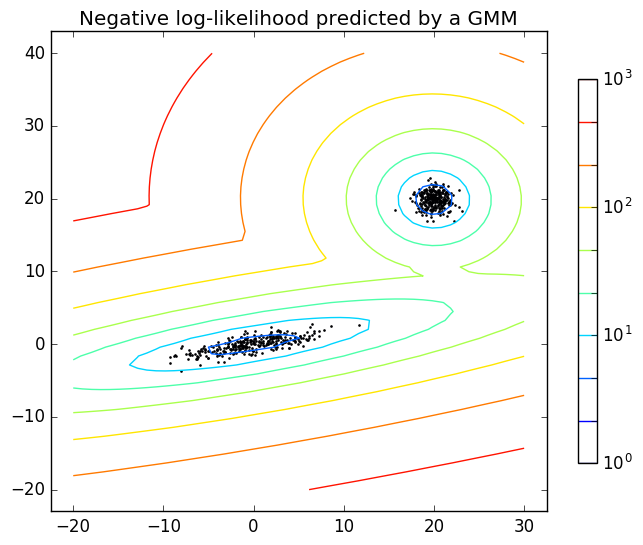

In [2]:
# display predicted scores by the model as a contour plot
x = range(-20.0, stop=30.0)
y = range(-20.0, stop=40.0)
X, Y = meshgrid(x, y)
XX = hcat(X[:], Y[:])
Z = -score_samples(clf, XX)

Z = reshape(Z, size(X))

CS = contour(X, Y, Z, norm=mpl_colors.LogNorm(vmin=1.0, vmax=1000.0),
             levels=logspace(0, 3, 10))
CB = colorbar(CS, shrink=0.8, extend="both")
scatter(X_train[:, 1], X_train[:, 2], .8)

title("Negative log-likelihood predicted by a GMM")
axis("tight");

#### Posterior probability of each data point

This computes the (posterior) probability of each point being in cluster 1 vs. cluster 2 (it's ordered because of the way we built X):

In [3]:
predict_proba(clf, X_train)

600×2 Array{Float64,2}:
 3.97461e-141  1.0         
 3.57557e-112  1.0         
 7.73662e-101  1.0         
 7.79742e-146  1.0         
 1.86899e-101  1.0         
 1.04168e-94   1.0         
 4.74714e-121  1.0         
 1.09878e-140  1.0         
 7.88034e-123  1.0         
 1.52832e-114  1.0         
 7.36057e-106  1.0         
 1.50613e-126  1.0         
 3.56267e-93   1.0         
 ⋮                         
 1.0           7.50692e-174
 1.0           4.34159e-115
 1.0           5.54185e-190
 1.0           6.1195e-198 
 1.0           3.20059e-152
 1.0           3.94132e-135
 1.0           1.38236e-112
 1.0           3.81567e-170
 1.0           3.25009e-181
 1.0           5.6759e-181 
 1.0           6.01246e-249
 1.0           3.3006e-147 

`predict` yields the cluster to which it belongs:

In [4]:
predict(clf, X_train)

600-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

# Grid-search to find the optimal number of clusters

In [5]:
using ScikitLearn.GridSearch

In [6]:
grid_search = fit!(GridSearchCV(GMM(n_components=3, kind=:full), Dict(:n_components=>[1,2,3,4,5,6])), X_train)

INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 400 data points


Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.821221e+04
      1       4.717918e+03      -1.349429e+04 |        2
      2       4.713803e+03      -4.115211e+00 |        0
      3       4.713803e+03       0.000000e+00 |        0
K-means converged with 3 iterations (objv = 4713.802531784696)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.482854e+03
      1       3.436488e+03      -1.046366e+03 |        0
      2       3.436488e+03       0.000000e+00 |        0
K-means converged with 2 iterations (objv = 3436.4881168493384)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.513648e+03
      1       2.162762e+03      -2.350886e+03 |        0
      2       2.162762e+03       0.000000e+00 |        0
K-means converged with 2 iterations

INFO: K-means with 400 data points using 3 iterations
66.7 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.060321
INFO: iteration 2, average log likelihood -2.060312
INFO: iteration 3, average log likelihood -2.060312
INFO: iteration 4, average log likelihood -2.060312
INFO: iteration 5, average log likelihood -2.060312
INFO: iteration 6, average log likelihood -2.060312
INFO: iteration 7, average log likelihood -2.060312
INFO: iteration 8, average log likelihood -2.060312
INFO: iteration 9, average log likelihood -2.060312
INFO: iteration 10, average log likelihood -2.060312
INFO: EM with 400 data points 10 iterations avll -2.060312
36.4 data points per parameter
INFO: Initializing GMM, 2 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 2 iterations
66.7 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.499241e+03
      1       2.035751e+03      -2.463490e+03 |        2
      2       1.844393e+03      -1.913580e+02 |        2
      3       1.729037e+03      -1.153562e+02 |        2
      4       1.664768e+03      -6.426910e+01 |        2
      5       1.623391e+03      -4.137703e+01 |        2
      6       1.595023e+03      -2.836753e+01 |        2
      7       1.579721e+03      -1.530260e+01 |        2
      8       1.567036e+03      -1.268527e+01 |        2
      9       1.566232e+03      -8.038358e-01 |        2
     10       1.566041e+03      -1.905610e-01 |        0
     11       1.566041e+03       0.000000e+00 |        0
K-means converged with 11 iterations (objv = 1566.0411445832567)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.779983e+03
      1       

INFO: iteration 3, average log likelihood -2.061034
INFO: iteration 4, average log likelihood -2.059899
INFO: iteration 5, average log likelihood -2.059317
INFO: iteration 6, average log likelihood -2.058981
INFO: iteration 7, average log likelihood -2.058771
INFO: iteration 8, average log likelihood -2.058631
INFO: iteration 9, average log likelihood -2.058532
INFO: iteration 10, average log likelihood -2.058460
INFO: EM with 400 data points 10 iterations avll -2.058460
23.5 data points per parameter
INFO: Initializing GMM, 3 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 11 iterations
44.4 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 3 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.048481
INFO: iteration 2, average log likelihood -2.042271
INFO: iteration 3, average log likelihood -2.040435
INFO: iteration 4, average log likelihood -2.039638
INFO: iteration 5, average log l

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.254447e+03
      1       1.599607e+03      -6.548396e+02 |        4
      2       1.526053e+03      -7.355386e+01 |        4
      3       1.482710e+03      -4.334311e+01 |        4
      4       1.453337e+03      -2.937267e+01 |        4
      5       1.437610e+03      -1.572739e+01 |        4
      6       1.424843e+03      -1.276744e+01 |        4
      7       1.423950e+03      -8.926239e-01 |        4
      8       1.423742e+03      -2.076569e-01 |        0
      9       1.423742e+03       0.000000e+00 |        0
K-means converged with 9 iterations (objv = 1423.7423072752413)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.221258e+03
      1       9.960676e+02      -2.251900e+02 |        3
      2       9.319000e+02      -6.416760e+01 |        3
      3       9

INFO: EM with 400 data points 10 iterations avll -2.054461
17.4 data points per parameter
INFO: Initializing GMM, 4 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 9 iterations
33.3 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 4 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.057174
INFO: iteration 2, average log likelihood -2.043711
INFO: iteration 3, average log likelihood -2.039123
INFO: iteration 4, average log likelihood -2.036080
INFO: iteration 5, average log likelihood -2.033800
INFO: iteration 6, average log likelihood -2.032461
INFO: iteration 7, average log likelihood -2.031634
INFO: iteration 8, average log likelihood -2.031089
INFO: iteration 9, average log likelihood -2.030719
INFO: iteration 10, average log likelihood -2.030466
INFO: EM with 400 data points 10 iterations avll -2.030466
17.4 data points per parameter
INFO: Initializing GMM, 4 Gaussians diag covari

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.361257e+03
      1       9.063186e+02      -4.549381e+02 |        5
      2       9.002513e+02      -6.067355e+00 |        3
      3       8.976158e+02      -2.635467e+00 |        3
      4       8.954073e+02      -2.208544e+00 |        3
      5       8.931700e+02      -2.237268e+00 |        3
      6       8.914833e+02      -1.686760e+00 |        2
      7       8.909720e+02      -5.112851e-01 |        2
      8       8.906234e+02      -3.485786e-01 |        2
      9       8.906046e+02      -1.874453e-02 |        2
     10       8.905777e+02      -2.694399e-02 |        0
     11       8.905777e+02       0.000000e+00 |        0
K-means converged with 11 iterations (objv = 890.5777033708389)
  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.330284e+03
      1       6

INFO: iteration 7, average log likelihood -2.028338
INFO: iteration 8, average log likelihood -2.027855
INFO: iteration 9, average log likelihood -2.027490
INFO: iteration 10, average log likelihood -2.027209
INFO: EM with 400 data points 10 iterations avll -2.027209
13.8 data points per parameter
INFO: Initializing GMM, 5 Gaussians diag covariance 2 dimensions using 400 data points
INFO: K-means with 400 data points using 11 iterations
26.7 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 5 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -1.866597
INFO: iteration 2, average log likelihood -1.847483
INFO: iteration 3, average log likelihood -1.842273
INFO: iteration 4, average log likelihood -1.840068
INFO: iteration 5, average log likelihood -1.838909
INFO: iteration 6, average log likelihood -1.838214
INFO: iteration 7, average log likelihood -1.837756
INFO: iteration 8, average log likelihood -1.837433
INFO: iteration 9, average log l

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.411528e+05
      1       4.081095e+04      -2.003419e+05 |        2
      2       5.181026e+03      -3.562992e+04 |        2
      3       5.165666e+03      -1.536031e+01 |        0
      4       5.165666e+03       0.000000e+00 |        0
K-means converged with 4 iterations (objv = 5165.666163455702)


INFO: K-means with 600 data points using 4 iterations
100.0 data points per parameter
INFO: Running 10 iterations EM on full cov GMM with 2 Gaussians in 2 dimensions
INFO: iteration 1, average log likelihood -2.026541
INFO: iteration 2, average log likelihood -2.026538
INFO: iteration 3, average log likelihood -2.026538
INFO: iteration 4, average log likelihood -2.026538
INFO: iteration 5, average log likelihood -2.026538
INFO: iteration 6, average log likelihood -2.026538
INFO: iteration 7, average log likelihood -2.026538
INFO: iteration 8, average log likelihood -2.026538
INFO: iteration 9, average log likelihood -2.026538
INFO: iteration 10, average log likelihood -2.026538
INFO: EM with 600 data points 10 iterations avll -2.026538
54.5 data points per parameter


ScikitLearn.Skcore.GridSearchCV
  estimator: GaussianMixtures.GMM{Float64,Array{UpperTriangular{Float64,Array{Float64,2}},1}}
  param_grid: Dict{Symbol,Array{Int64,1}}
  scoring: Void nothing
  loss_func: Void nothing
  score_func: Void nothing
  fit_params: Dict{Any,Any}
  n_jobs: Int64 1
  iid: Bool true
  refit: Bool true
  cv: Void nothing
  verbose: Int64 0
  error_score: String "raise"
  scorer_: ScikitLearnBase.score (function of type ScikitLearnBase.#score)
  best_params_: Dict{Symbol,Any}
  best_score_: Float64 -2.266662439479441
  grid_scores_: Array{ScikitLearn.Skcore.CVScoreTuple}((6,))
  best_estimator_: GaussianMixtures.GMM{Float64,Array{UpperTriangular{Float64,Array{Float64,2}},1}}


As expected, n_components=2 has the highest score. Note that [Variational Bayes](https://github.com/davidavdav/GaussianMixtures.jl#variational-bayes-training) is usually a more data-efficient way of selecting the number of components (though it is incompatible with the ScikitLearn.jl pipeline).

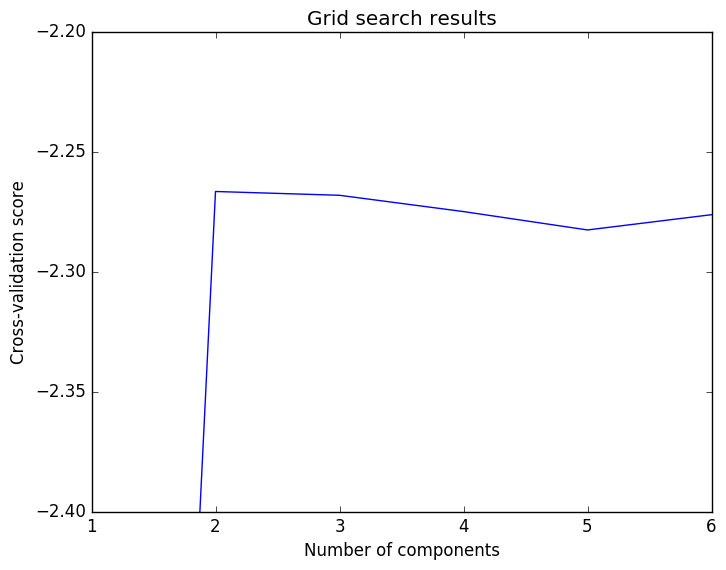

In [7]:
n_comps, results = zip([(first(values(gs.parameters)), gs.mean_validation_score) for gs in grid_search.grid_scores_]...);

plot(n_comps, results)
xlabel("Number of components")
ylabel("Cross-validation score")
title("Grid search results")
ylim([-2.4, -2.2]);